In [1]:
import caiman as cm 
from caiman.motion_correction import MotionCorrect
from caiman.source_extraction.cnmf.params import CNMFParams
from caiman.motion_correction import compute_metrics_motion_correction
import numpy as np
import matplotlib.pyplot as plt

Notebook inspired from the caiman tutorial notebook: https://github.com/flatironinstitute/CaImAn/blob/main/demos/notebooks/demo_motion_correction.ipynb

Rigid with border_nan set to copy

In [10]:
filename = "../data/Sue_2x_3000_40_-46.tif"
fnames = [filename]
raw_data_2p = cm.load(filename)
mc_rigid = MotionCorrect(
    fname = fnames,
    pw_rigid = False,
    border_nan='copy'
)
mc_rigid.motion_correct(save_movie=True)

In [3]:
final_size_x, final_size_y = mc_rigid.total_template_rig.shape
winsize = 100
swap_dim = False
resize_fact_flow = .2    
tmpl_orig, correlations_orig, flows_orig, norms_orig, crispness_orig = compute_metrics_motion_correction(
    fnames[0], 
    final_size_x, 
    final_size_y, 
    swap_dim, 
    winsize=winsize, 
    play_flow=False, 
    resize_fact_flow=resize_fact_flow
    )


In [4]:
final_size_x, final_size_y = mc_rigid.total_template_rig.shape

In [ ]:
winsize = 100
swap_dim = False
resize_fact_flow = .2    
tmpl_rig, correlations_rig, flows_rig, norms_rig, crispness_rig = compute_metrics_motion_correction(
    mc_rigid.fname_tot_rig[0], 
    final_size_x, 
    final_size_y, 
    swap_dim, 
    winsize=winsize, 
    play_flow=False, 
    resize_fact_flow=resize_fact_flow
    )

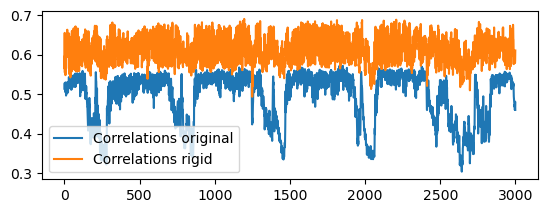

In [7]:
plt.subplot(211)
plt.plot(correlations_orig, label='Correlations original')
plt.plot(correlations_rig, label='Correlations rigid')
plt.legend()

Rigid with border_nan set to True

In [11]:
filename = "../data/Sue_2x_3000_40_-46.tif"
fnames = [filename]
raw_data_2p = cm.load(filename)
mc_rigid_nan = MotionCorrect(
    fname = fnames,
    pw_rigid = False,
    border_nan=True
)
mc_rigid_nan.motion_correct(save_movie=True)

c:\Users\sangeetha\anaconda3\envs\caiman\lib\site-packages\caiman\motion_correction.py:3118: RuntimeWarning: Mean of empty slice
  new_temp = np.nanmean(mc, 0)


In [13]:
bord_px_rig = np.ceil(np.max(mc_rigid_nan.shifts_rig)).astype(int)
bord_px_rig

3

In [14]:
final_size_x, final_size_y = np.subtract(mc_rigid_nan.total_template_rig.shape, 2 * bord_px_rig) 

In [15]:
winsize = 100
swap_dim = False
resize_fact_flow = .2    
tmpl_rig_nan, correlations_rig_nan, flows_rig_nan, norms_rig_nan, crispness_rig_nan = compute_metrics_motion_correction(
    mc_rigid.fname_tot_rig[0], 
    final_size_x, 
    final_size_y, 
    swap_dim, 
    winsize=winsize, 
    play_flow=False, 
    resize_fact_flow=resize_fact_flow
    )

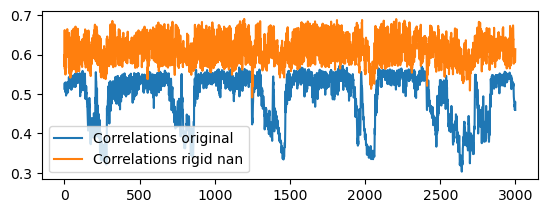

In [19]:
plt.subplot(211)
plt.plot(correlations_orig, label='Correlations original')
plt.plot(correlations_rig_nan, label='Correlations rigid nan')

plt.legend()

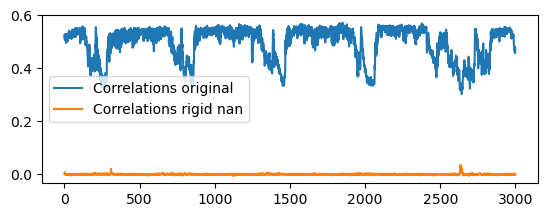

In [22]:
plt.subplot(211)
plt.plot(correlations_orig, label='Correlations original')
plt.plot(np.array(correlations_rig_nan)-np.array(correlations_rig), label='Correlations rigid nan')
plt.legend()

In [24]:
print('Crispness original: ' + str(int(crispness_orig)))
print('Crispness rigid: ' + str(int(crispness_rig)))
print('Crispness rigid nan: ' + str(int(crispness_rig_nan)))

Crispness original: 2007
Crispness rigid: 2833
Crispness rigid nan: 2782


Elastic motion correction

In [26]:
mc_els = MotionCorrect(
    fnames, 
    max_shifts=(6, 6),
    strides=(48, 48),
    overlaps=(24, 24),
    max_deviation_rigid=3,
    shifts_opencv=True,
    nonneg_movie=True,
    border_nan='copy',
    pw_rigid=True
)
mc_els.motion_correct(save_movie=True)

In [29]:
final_size_x, final_size_y = mc_els.total_template_els.shape

In [30]:
winsize = 100
swap_dim = False
resize_fact_flow = .2    
tmpl_els, correlations_els, flows_els, norms_els, crispness_els = compute_metrics_motion_correction(
    mc_els.fname_tot_els[0], 
    final_size_x, 
    final_size_y, 
    swap_dim, 
    winsize=winsize, 
    play_flow=False, 
    resize_fact_flow=resize_fact_flow
    )

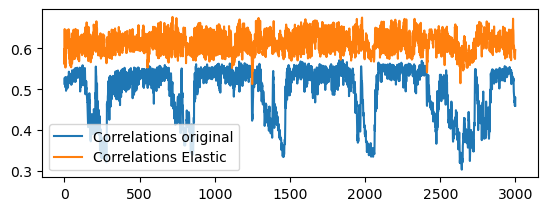

In [31]:
plt.subplot(211)
plt.plot(correlations_orig, label='Correlations original')
plt.plot(correlations_els, label='Correlations Elastic')

plt.legend()

In [32]:
print('Crispness original: ' + str(int(crispness_orig)))
print('Crispness rigid: ' + str(int(crispness_rig)))
print('Crispness rigid nan: ' + str(int(crispness_rig_nan)))
print('Crispness elastic: ' + str(int(crispness_els)))

Crispness original: 2007
Crispness rigid: 2833
Crispness rigid nan: 2782
Crispness elastic: 2939
